<a href="https://colab.research.google.com/github/hovanja2011/sound/blob/main/%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA_%D0%B0%D1%83%D0%B4%D0%B8%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import sklearn
from statistics import median
import random 
import numpy as np
import pandas as pd

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## предобработка

In [24]:
instruments=['piano','guitar','saxophone','choir','trumpet','vibes']
instr_octave=['piano','guitar','saxophone','choir']
notes=['do','re','mi','fa','sol','la']
# audio_names=['audio/'+name+'.wav' for name in instruments]
audio_data={}
sr=44100
for name in notes :
  audio_data[name],_=librosa.load('drive/MyDrive/audio/guita_notes/'+name+'.wma', sr=44100)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

### суммирование треков и проигрывание

In [ ]:
def combine_tracks(data,track1, track2):
  l1=len(data[track1])
  l2=len(data[track2])
  n1=data[track1].copy()
  n2=data[track2].copy()
  l=max(l1,l2)
  #приведение к общей длине дорожек
  n1.resize(l)
  n2.resize(l)
  return(n1+n2)


проигрывание аудио онлайн

In [51]:
# ipd.Audio('drive/MyDrive/audio/guita_notes/do.wma')
ipd.Audio(audio, rate=sr)

### график массива аудио

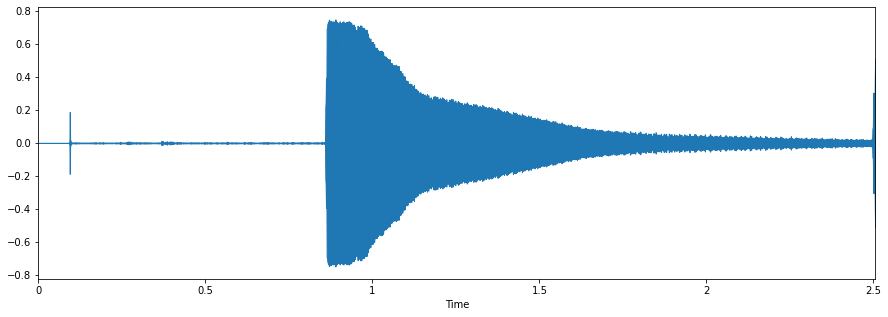

In [26]:
%matplotlib inline
def print_waveplot(data):
  plt.figure(figsize=(15, 5))
  librosa.display.waveplot(data,sr=sr)

# print_waveplot(audio_data['do'])

### получение спектрограммы (логарифмической, иначе - "hz")

In [43]:
def print_spectrogram(data,sr=44100,name='name',yaxis='log'):
  x = data
  x_t = librosa.stft(x)
  xt_a = librosa.amplitude_to_db(abs(x_t))
  plt.figure(figsize=(15,5))
  librosa.display.specshow(xt_a, sr=sr, x_axis='time', y_axis=yaxis)
  plt.title(name)
  plt.colorbar()
  # return(xt_a)
def get_spectrogram(data,sr=44100,name='name'):
  x = data
  x_t = librosa.stft(x)
  xt_a = abs(x_t)
  return(xt_a)


### другие функции

**1. Спектральный центроид**\
получение графика спектральноо центроида в динамике

In [ ]:

def get_spectralcentroid (data,key,sr=44100):
  spectral_centroids = librosa.feature.spectral_centroid(data[key], sr=sr)[0]
  plt.figure(figsize=(10, 3))
  frames = range(len(spectral_centroids))
  t = librosa.frames_to_time(frames,sr=sr)
  librosa.display.waveplot(data[key], sr=sr, alpha=0.4)
  plt.plot(t, normalize(spectral_centroids), color='b')

# Нормализация спектрального центроида для визуализации
def normalize(x_g, axis=0):
    return sklearn.preprocessing.minmax_scale(x_g, axis=axis)

get_spectralcentroid(audio_data,'guitar')


KeyError: ignored

***2. Спектральный спад***

In [ ]:
x=audio_data['guitar']
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames,sr=sr)
plt.plot(t, normalize(spectral_rolloff), color='r')

**3. Спектральная ширина**

In [ ]:
x=audio_data['guitar']
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

**4. Скорость пересечения нуля**

увеличиваем кусок и считаем количество пересечений нуля

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

**5. Мел-частотные кепстральные коэффициенты (MFCC)**

форма спектральной огибающей

In [ ]:
x=audio_data['trumpet']
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**6. Цветность**

In [ ]:
def get_chromogram(data,key,sr=44100):
  chromagram = librosa.feature.chroma_stft(data[key], sr=sr)
  plt.figure(figsize=(9, 3))
  plt.title(key)
  librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

get_chromogram(audio_data,'trumpet')

## обработка

### шумоподавление

In [28]:
#Простейший алгоритм скользящего среднего

def noise_removal(track, depth=200):
  l=len(track)
  y=np.zeros(l)
  y[:depth]=track[:depth]
  y[depth]=(y[depth]+sum(y[:depth]))/depth
  for i in range(depth+1,l,1):
    y[i]=y[i-1]+(track[i]-track[i-depth])/depth
  return (y)

### неотрицательная матричная факторизация

In [ ]:
def nmf(spec,k,nmax):
  (h,l)=spec.shape
  V=spec
  W=np.random.sample((h,k))+np.ones((h,k))
  H=np.random.sample((k,l))+np.ones((k,l))
  eps=2.2**(-16)
  for i in range(nmax): 
    C = np.divide(V, (np.dot(W,H)+eps*np.ones((h,l))))
    H = np.divide(np.multiply(H ,np.dot(W.T, C)), np.dot(W.T, np.ones((h,l))) )
    W = np.divide(np.multiply(W ,np.dot(C, H.T)), np.dot(np.ones((h,l)), H.T) )
  sumW=np.dot(np.ones((1,h)),W)
  sumWd = np.divide(np.ones((1,k)) , np.dot(np.ones((1,h)),W) )
  W = np.dot(W, np.diag(sumWd[0] ))
  H = np.dot(np.diag( sumW[0]),H)
  return((W,H))

In [ ]:
spec=np.abs(librosa.stft(audio_data['guitar'][:200000]))
W,H = librosa.decompose.decompose(spec,16)
V=np.dot(W,H)
plt.figure(figsize=(10,5))
librosa.display.specshow(spec-V, sr=sr, x_axis='time',  y_axis='log' )
plt.colorbar()
print('Доля максимальной разности от максимального значения: ', np.max(spec-V)/(np.max(spec)))


KeyError: ignored

## способ_мой выделяю базисные вектора нот и раскладываю по ним

### обрезание записи до половины максимума

In [32]:
def cutting_track(track):
  track=noise_removal(track)
  start=np.argmax(track)
  max=track[start]
  finish=np.argwhere(track>max/3)[-1][0]
  #waveplot
  # plt.figure(figsize=(15,5))
  # plt.title("беcшумный трек")
  # plt.plot(track)
  #cutted waveplot
  # plt.figure(figsize=(15,5))
  # plt.title("только часть, где аплитуда больше половины максимальной")
  track=track[start:finish]
  # plt.plot(track)
  return (track)

# cutting_track(audio_data['do'])


### получение базисного вектора для одной записи

In [33]:
def get_basis_vec(track):
  track_spec=get_spectrogram(track)
  median_track=np.median(track_spec,axis=1)
  #вектор медиан
  # plt.figure(figsize=(15,5))
  # plt.title("вектор медиан")
  # plt.plot(median_track)
  #нормирование
  k=np.sqrt(np.sum(median_track**2))
  bas=median_track/(k)
  # plt.figure(figsize=(15,5))
  # plt.title("нормированный вектор")
  # plt.plot(bas)
  return(bas)



array([ 8.88783772e-05, -3.26577900e-03, -4.06804200e-03, ...,
       -3.20471051e-02, -3.20471051e-02, -3.20471051e-02])

### создаю массив базисов

In [44]:
basis=dict.fromkeys(notes) 
for i in notes:
  basis[i]=get_basis_vec(audio_data[i])

### раскладываю мелодию по базисам

In [152]:
track,_=librosa.load('drive/MyDrive/audio/guita_notes/lasidore.wma', sr=44100)
def audio_decomposition(audio):
  audio_spec=get_spectrogram(audio)
  print_waveplot(audio)
  h,w=audio_spec.shape
  W=dict.fromkeys(notes) 
  for j in notes:
    W[j]=np.zeros([w])
    for i in range(w):
      # W[j][i]=min(np.divide(audio_spec[:,i],basis[j]))
      W[j][i]=sum(audio_spec[:,i]*basis[j])
  df=pd.DataFrame(W)
  df.plot(figsize=(15,5))
  return(ipd.Audio(audio, rate=sr))



/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


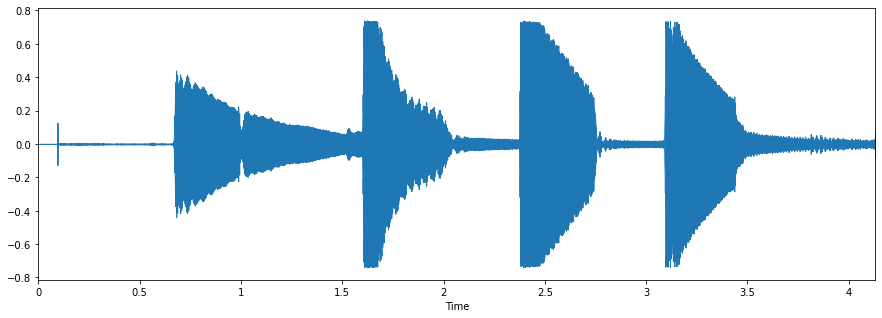

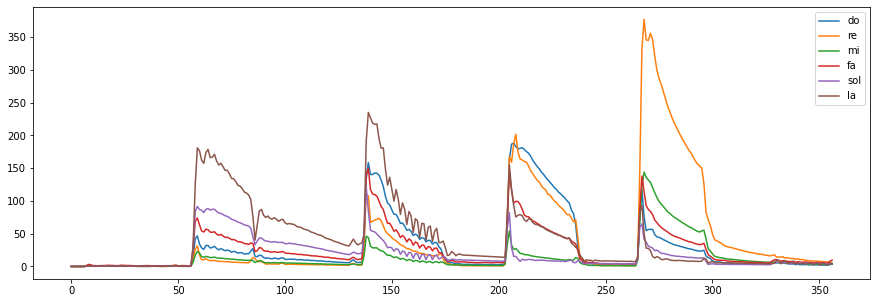

In [153]:
audio_decomposition(track)

### .